In [1]:
import numpy as np
from IPython.core.pylabtools import figsize

array = np.arange(24)
array2 = array.reshape(3,2,4)
print(array2)

[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]

 [[16 17 18 19]
  [20 21 22 23]]]


In [2]:
#print(array2[[1],:,1:3])
#print(array2[[2],[1],:])
print(array2.min(axis=0))

[[0 1 2 3]
 [4 5 6 7]]


In [3]:
import pandas as pd

In [4]:
cars = pd.read_csv('cars.csv')
#cars.describe()
#cars.info()
cars.head(5)

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000


In [5]:
cars[['brand','owner']].head(5)

,brand,owner
0,Maruti,First Owner
1,Skoda,Second Owner
2,Honda,Third Owner
3,Hyundai,First Owner
4,Maruti,First Owner


In [6]:
def get_cars(city,owner):
    mask1 = cars['brand']==city
    mask2 = cars['owner']==owner
    return cars[mask1 & mask2].shape[0]
print(get_cars("Skoda","First Owner"))

68


In [7]:
print(cars['owner'].value_counts())
t_car = cars[cars['owner']=="Fourth & Above Owner"]
print(t_car['brand'].value_counts())

owner
First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: count, dtype: int64
brand
Maruti        67
Hyundai       41
Mahindra      15
Tata          14
Toyota        11
Chevrolet     11
Volkswagen     6
Ford           5
Nissan         1
Honda          1
Audi           1
BMW            1
Name: count, dtype: int64


<Axes: xlabel='brand'>

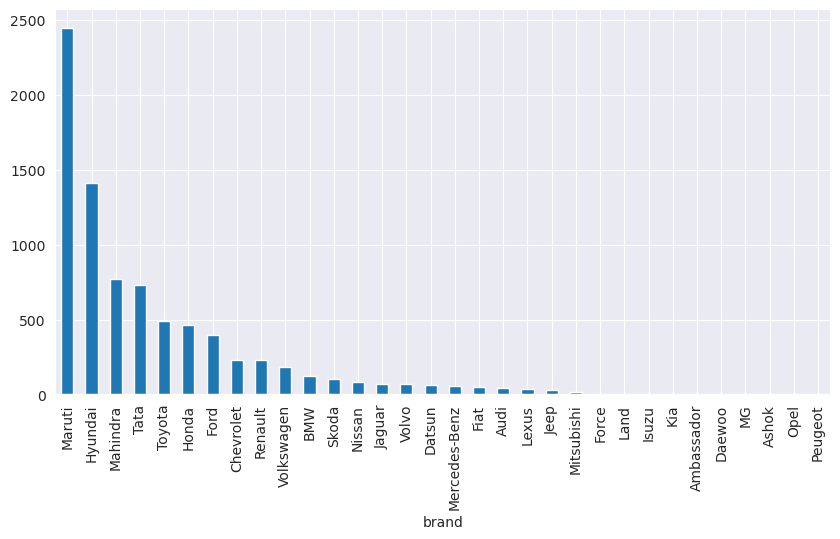

In [8]:
import matplotlib.pyplot as plt
cars['brand'].value_counts().plot(kind='bar',figsize=(10,5))

In [9]:
brand = cars.groupby('brand')

In [10]:
brand.size().head(1)

brand
Ambassador    4
dtype: int64

In [11]:
brand['km_driven'].mean().head(1)

brand
Ambassador    82500.0
Name: km_driven, dtype: float64

In [12]:
brand.get_group('BMW').head(1)

,brand,km_driven,fuel,owner,selling_price
82,BMW,30000,Petrol,Second Owner,2500000


In [13]:
cars.pivot_table(index='brand',columns = 'owner',values='km_driven',aggfunc='mean')
cars.head(1)

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000


<Axes: ylabel='selling_price'>

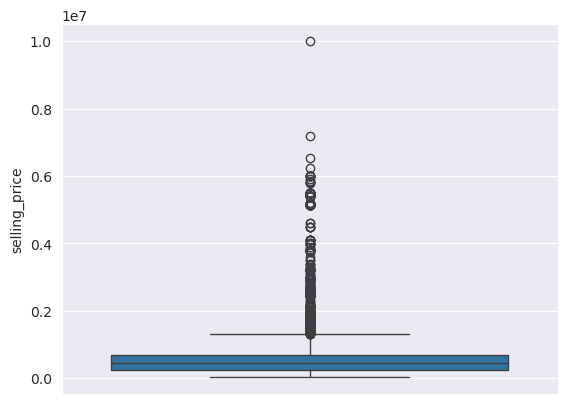

In [14]:
import seaborn as sns
sns.boxplot(cars['selling_price'])

In [15]:
##sns.boxplot(cars['selling_price'])
cars[cars['selling_price']==cars['selling_price'].max()]

,brand,km_driven,fuel,owner,selling_price
170,Volvo,30000,Petrol,First Owner,10000000


In [16]:
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
titanic = pd.read_csv('titanic_toy.csv')
titanic.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [17]:
x_train, x_test, y_train, y_test = train_test_split(titanic.drop(('Survived'),axis=1),titanic['Survived'], test_size=0.2, random_state=42)
scaler = StandardScaler()


In [18]:
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [19]:
x_test_scaled = pd.DataFrame(x_test_scaled,columns=x_test.columns)
x_test_scaled.head(10)

,Age,Fare,Family
0,NaN,-0.328949,0.634859
1,0.103618,-0.419333,-0.554666
2,-0.655664,-0.468375,-0.554666
3,-1.622022,0.009184,0.040096
4,-1.069817,-0.405208,0.040096
5,-0.241510,0.882407,-0.554666
6,NaN,-0.471708,-0.554666
7,-0.931766,-0.276494,0.634859
8,-0.931766,-0.471708,-0.554666
9,-0.724689,-0.118737,0.634859


In [20]:
titanic.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


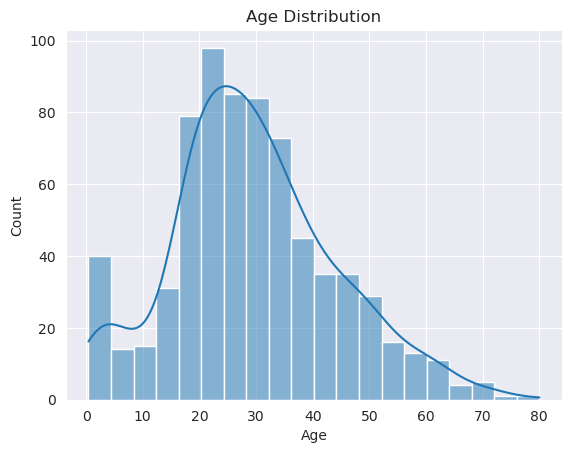

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming Titanic dataset is loaded in a DataFrame called 'titanic'
sns.histplot(titanic['Age'], kde=True)  # For Age
plt.title('Age Distribution')
plt.show()


## ENCODING CATEGORICAL DATA
- nominal encoding -> this is when there's no relation between categories
- ordinal encoding -> when relationship between categories e.x. excellent, good
- label encoding -> ordinal encoding but specifically made for output

### ORDINAL ENCODING
- if we dont want to run some columns then we can slice the data and then merge later
- e.x. final_data = pd.concat([encoded_df, data['col3']], axis=1)






In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
oe = OrdinalEncoder(categories=[['Poor','Average','Good'],['School','UG','PG']])
x_train = oe.fit_transform(x_train)
x_test = oe.transform(x_test)
le = LabelEncoder()
# fit on y_train and y_test this does not need any input

### ONE HOT ENCODING
- pandas one hot encoding
- scikit learn one hot encoding
- k-1 one hot encoding
- one hot encoding with top categories -> when we too many categories

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
x_train_new = ohe.fit_transform(x_train[['fuel','owner']])
x_test_new = ohe.transform(x_test[['fuel','owner']])

## COLUMN TRANSFORMER
